In [72]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import sys
import dlib
import numpy

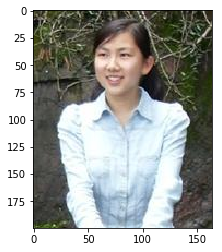

In [73]:
facePath = "girl.jpg"
profilePath = "profile.jpg"
fullImg = cv2.cvtColor(cv2.imread(facePath), cv2.COLOR_BGR2RGB)
profileFullImg = cv2.cvtColor(cv2.imread(profilePath), cv2.COLOR_BGR2RGB)
plt.imshow(fullImg)

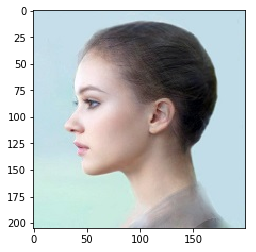

In [74]:
plt.imshow(profileFullImg)

In [75]:
detector = dlib.get_frontal_face_detector()
profileDetector = dlib.get_frontal_face_detector()
dets = detector(fullImg, 1)
profileDets = profileDetector(profileFullImg, 1)
print "face number is {0} & {1}".format(len(dets), len(profileDets))
detect = dets[0]
print "Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(0, detect.left(), detect.top(), detect.right(), detect.bottom())
profileDetect = profileDets[0]
print "& Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(0, profileDetect.left(), profileDetect.top(),
                                                                     profileDetect.right(), profileDetect.bottom())

face number is 1 & 1
Detection 0: Left: 55 Top: 31 Right: 98 Bottom: 74
& Detection 0: Left: -15 Top: 55 Right: 85 Bottom: 145


In [76]:
shapePredict = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

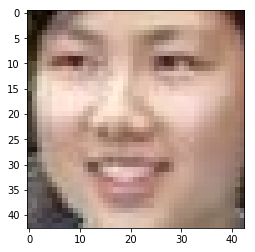

In [77]:
faceImg = fullImg[detect.top():detect.bottom(),detect.left():detect.right(),:]
plt.imshow(faceImg)

ValueError: zero-size array to reduction operation minimum which has no identity

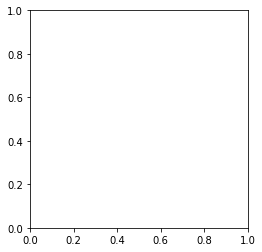

In [78]:
profileImg = profileFullImg[profileDetect.top():profileDetect.bottom(),profileDetect.left():profileDetect.right(),:]
plt.imshow(profileImg)

In [61]:
shape = shapePredict(fullImg, detect)
print "Total parts of {}.".format(shape.num_parts)
profileShape = shapePredict(profileFullImg, profileDetect)
print "&Total parts of {}.".format(shape.num_parts)

Total parts of 68.
&Total parts of 68.


In [62]:
xMin = len(fullImg[0])
xMax = 0
yMin = len(fullImg)
yMax = 0
for i in range(shape.num_parts):
    if (shape.part(i).x < xMin):
        xMin = shape.part(i).x
    if (shape.part(i).x > xMax):
        xMax = shape.part(i).x
    if (shape.part(i).y < yMin):
        yMin = shape.part(i).y
    if (shape.part(i).y > yMax):
        yMax = shape.part(i).y
print "x min is {}, x max is {}, y min is {}, y max is {}".format(xMin, xMax, yMin, yMax)

x min is 56, x max is 101, y min is 34, y max is 78


In [69]:
pxMin = len(profileFullImg[0])
pxMax = 0
pyMin = len(profileFullImg)
pyMax = 0
for i in range(profileShape.num_parts):
    if (profileShape.part(i).x < pxMin):
        pxMin = profileShape.part(i).x
    if (profileShape.part(i).x > pxMax):
        pxMax = profileShape.part(i).x
    if (profileShape.part(i).y < pyMin):
        pyMin = profileShape.part(i).y
    if (profileShape.part(i).y > pyMax):
        pyMax = profileShape.part(i).y
print "x min is {}, x max is {}, y min is {}, y max is {}".format(pxMin, pxMax, pyMin, pyMax)

x min is 32, x max is 200, y min is 160, y max is 326


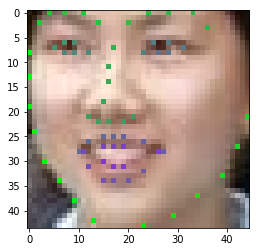

In [64]:
newImage = fullImg
for i in range(len(fullImg)):
    for j in range(len(fullImg[0])):
        found = False
        for k in range(shape.num_parts):
            if (shape.part(k).x == j and shape.part(k).y == i):
                newImage[i][j] = [k*2,255-k*3,k*3]
                break
plt.imshow(newImage[yMin:yMax,xMin:xMax,:])

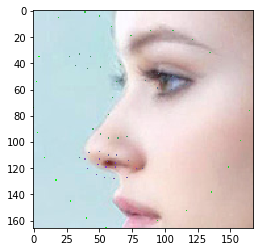

In [71]:
newProfileImage = profileFullImg
for i in range(len(profileFullImg)):
    for j in range(len(profileFullImg[0])):
        found = False
        for k in range(profileShape.num_parts):
            if (profileShape.part(k).x == j and profileShape.part(k).y == i):
                newProfileImage[i][j] = [k*2,255-k*3,k*3]
                break
plt.imshow(newProfileImage[pyMin:pyMax,pxMin:pxMax,:])

In [ ]:
print 